### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [255]:
data = pd.read_csv('Data/coupons.csv')

In [256]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [257]:
data.isna().sum()
# very few valid values  for car
'''
for col in data.columns:
    if data[col].isna().sum():
        print("##########################")    
        print(data[col].value_counts())
        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        print("sum of nan", data[col].isna().sum())
'''

'\nfor col in data.columns:\n    if data[col].isna().sum():\n        print("##########################")    \n        print(data[col].value_counts())\n        print("@@@@@@@@@@@@@@@@@@@@@@@@@@@")\n        print("sum of nan", data[col].isna().sum())\n'

3. Decide what to do about your missing data -- drop, replace, other...

In [258]:
#Based on the above info: Dropping the car col as the very few data points available 12576/12684 unavailable
data.drop('car', axis=1,inplace=True)
data.shape
# rest of NAN columns, replace NANs with the idxmax values
data["Bar"].fillna(data["Bar"].value_counts().idxmax(), inplace=True)
data["CoffeeHouse"].fillna(data["CoffeeHouse"].value_counts().idxmax(), inplace=True)
data["CarryAway"].fillna(data["CarryAway"].value_counts().idxmax(), inplace=True)
data["Restaurant20To50"].fillna(data["Restaurant20To50"].value_counts().idxmax(), inplace=True)
data["RestaurantLessThan20"].fillna(data["RestaurantLessThan20"].value_counts().idxmax(), inplace=True)
#no NANs in the data
#data.isna().sum()

In [259]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

4. What proportion of the total observations chose to accept the coupon? 



In [260]:
#proportion of coupons accepted from the data
cpn_accpted_prop = (data.loc[data['Y']==1].count()['Y']/data['Y'].count())*100
print("percentage of coupons accepted ", cpn_accpted_prop,"%")

percentage of coupons accepted  56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon vs Coupon accepted("Y=1")'}, xlabel='coupon'>

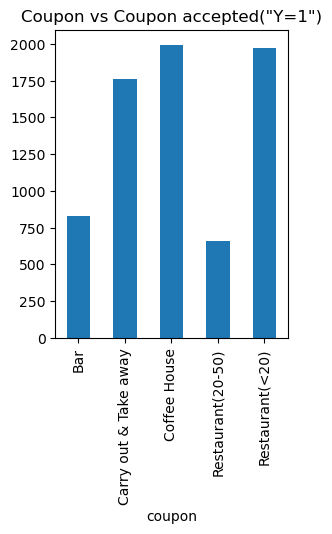

In [261]:
#Based on the below graph, it is very clear that out of accepted coupons, the coffee house and restaurant <20 are the most preferred choice
data_grouped = data.groupby('coupon').sum()
data_grouped['Y'].plot(kind='bar',stacked=False,figsize=(3, 4),title='Coupon vs Coupon accepted("Y=1")')



6. Use a histogram to visualize the temperature column.

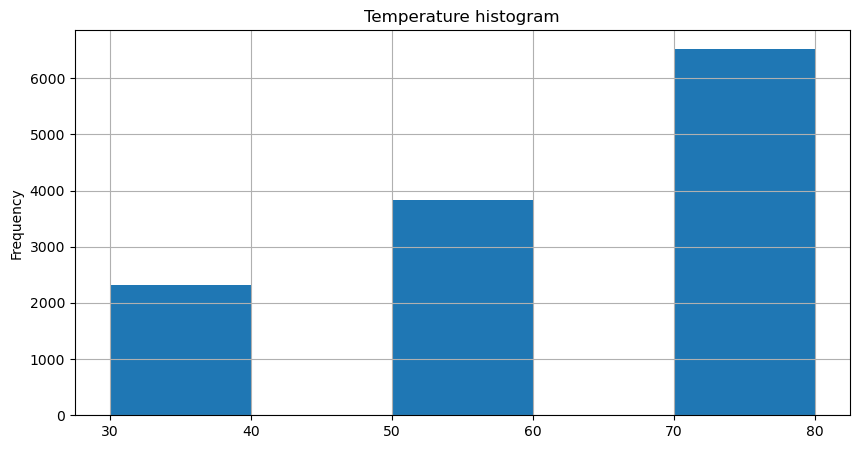

In [262]:
# From the histogram on the temperature column, the majority of the drives are enroutes in hot areas

#sns.displot(data["temperature"], kde=True, rug=True) #resulting warning for size hence using the pandas plot
ax=data['temperature'].plot(kind='hist', figsize=(10,5), bins=5, grid=True, title="Temperature histogram")


In [263]:
#data cleaning for age/Bar/RestaurantLessThan20 columns
data["age"] = data["age"].str.replace("50plus", "50")
#'21' '46' '26' '31' '41' '50plus' '36' 'below21'
data["age"] = data["age"].str.replace("below21", "20")
data["age"] = pd.to_numeric(data["age"])
#data.info()
#['never' 'less1' '1~3' 'gt8' '4~8']
data["Bar"] = data["Bar"].str.replace("never", "0")
data["Bar"] = data["Bar"].str.replace("less1", "1")
data["Bar"] = data["Bar"].str.replace("1~3", "3")
data["Bar"] = data["Bar"].str.replace("gt8", "9")
data["Bar"] = data["Bar"].str.replace("4~8", "8")
data["Bar"] = pd.to_numeric(data["Bar"])

#1~3      5506
#4~8      3580
#less1    2093
#gt8      1285
#never     220
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("never", "0")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("less1", "1")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("1~3", "3")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("gt8", "9")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("4~8", "8")
data["RestaurantLessThan20"] = pd.to_numeric(data["RestaurantLessThan20"])

#data.info()
print(data['maritalStatus'].value_counts())

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


In [264]:
#income data clean up
'''
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
'''
data["income"] = data["income"].str.replace("$25000 - $37499", "37499")
data["income"] = data["income"].str.replace("$12500 - $24999", "24999")
data["income"] = data["income"].str.replace("$37500 - $49999", "49999")
data["income"] = data["income"].str.replace("$100000 or More", "100001")
data["income"] = data["income"].str.replace("$50000 - $62499", "62499")
data["income"] = data["income"].str.replace("Less than $12500", "12499")
data["income"] = data["income"].str.replace("$87500 - $99999", "99999")
data["income"] = data["income"].str.replace("$75000 - $87499", "87499")
data["income"] = data["income"].str.replace("$62500 - $74999", "74999")
data["income"] = pd.to_numeric(data["income"])
#data.info()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [265]:
#data fram with bar coupons
df_bar_coupons = data.loc[data["coupon"]=="Bar"]
df_bar_coupons.shape  #2017 rows 

(2017, 25)

2. What proportion of bar coupons were accepted?


In [266]:
bar_cpn_accpted_prop = (df_bar_coupons.loc[data['Y']==1].count()['Y']/df_bar_coupons['Y'].count())
bar_cpn_accpted  = df_bar_coupons.loc[data['Y']==1]
print("bar coupons accepted rate", bar_cpn_accpted_prop)
#out of 2017 drivers, only 41% people accepted bar coupons

bar coupons accepted rate 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [267]:
bar_freq = df_bar_coupons['Bar'].unique()
print(bar_freq)
#print(df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[0:3]).sum())
#print(df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[3:5]).sum())

#print(df_bar_coupons.loc[df_bar_coupons['Y']==0]['Bar'].isin(bar_freq).sum())
#print(df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq).sum())
acc_rate_3_or_less = df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[0:3]).sum()/df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq).sum()
acc_rate_more_3    = df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[3:5]).sum()/df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq).sum()
print("acceptance rate for 3 or less: ", acc_rate_3_or_less)
print("acceptance rate for >3: ",acc_rate_more_3)

[0 1 3 9 8]
acceptance rate for 3 or less:  0.814993954050786
acceptance rate for >3:  0.18500604594921402


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [269]:
#age_freq = df_bar_coupons['age'].unique()
#print(age_freq)
#acc_rate_bar_more_than_once = df_bar_coupons.loc[(df_bar_coupons['Y']==1 & df_bar_coupons ["Bar"]>1)].sum()
#acc_rate_bar_more_than_once_age_over_25 = df_bar_coupons.loc[(df_bar_coupons['Y']==1 & df_bar_coupons["Bar"]>1&)].sum()

#print(acc_rate_3_or_less)

#ans5 = df_bar_coupons[.isin(bar_freq[2:])#um()
#df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[2:])#um()
#df_bar_coupons.loc[df_bar_coupons['Y']==1]['Bar'].isin(bar_freq[2:])['age'].isin(age_freq[1:7]).sum()


df_bar_coupons_acc = df_bar_coupons.loc[df_bar_coupons['Y']==1]
df_acceptance_rate_bar_more_than_once = df_bar_coupons_acc.loc[df_bar_coupons_acc['Bar']>1]
df_acceptance_rate_bar_more_than_once_age_above_25 = df_acceptance_rate_bar_more_than_once.loc[df_acceptance_rate_bar_more_than_once['age']>25]

#Answer = YES
acc_rate_bar_more_than_once =df_acceptance_rate_bar_more_than_once.shape[0] 
acceptance_rate_bar_more_than_once_age_above_25 = df_acceptance_rate_bar_more_than_once_age_above_25.shape[0]/acc_rate_bar_more_than_once
acceptance_rate_bar_more_than_once_age_above_25
print("acceptance rate for drives_bar_more_than_once_above_age_25: ",acceptance_rate_bar_more_than_once_age_above_25)
print("others: ",1-acceptance_rate_bar_more_than_once_age_above_25)


acceptance rate for drives_bar_more_than_once_above_age_25:  0.7121951219512195
others:  0.2878048780487805


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [270]:
total = df_acceptance_rate_bar_more_than_once.shape[0]

#df_acceptance_rate_bar_more_than_once['occupation'].value_counts()
#df_acceptance_rate_bar_more_than_once['passanger'].value_counts()
total_not_kid = (df_acceptance_rate_bar_more_than_once.loc[df_acceptance_rate_bar_more_than_once['passanger'] != "Kid(s)"]).shape[0]

#df_acceptance_rate_bar_more_than_once['occupation'].value_counts()
total_occ_other_than_FFF = total
acc_rate_bar_more_than_once_not_kids = total_not_kid/total
acc_rate_bar_more_than_once_not_3_occ = total_occ_other_than_FFF/total

print("Acc_rate_bar_more_than_once_not_kids: ",acc_rate_bar_more_than_once_not_kids)
print("acc_rate_bar_more_than_once_not_3_occ: ",acc_rate_bar_more_than_once_not_3_occ)


Acc_rate_bar_more_than_once_not_kids:  0.9585365853658536
acc_rate_bar_more_than_once_not_3_occ:  1.0


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [271]:
df_total_not_kid  = df_acceptance_rate_bar_more_than_once.loc[df_acceptance_rate_bar_more_than_once['passanger'] != "Kid(s)"]
acc_bar_more_than_once_not_kid_widowed = df_total_not_kid.loc[df_total_not_kid['maritalStatus']=='Widowed']
#go to bars more than once a month, had passengers that were not a kid, and were not widowed 
acc_bar_more_than_once_not_kid_not_widowed = df_total_not_kid.shape[0] - acc_bar_more_than_once_not_kid_widowed.shape[0]
#print(acc_bar_more_than_once_not_kid_not_widowed)

#go to bars more than once a month and are under the age of 30 OR
acc_bar_more_than_once_below_age_30 = df_acceptance_rate_bar_more_than_once.loc[df_acceptance_rate_bar_more_than_once['age']<30].shape[0]
#print(acc_bar_more_than_once_below_age_30)

#creating data for go to cheap restaurants more than 4 times a month and income is less than 50K.
df_cheaprest_coupons = data.loc[data["coupon"]=="Restaurant(<20)"]
df_acc_cheaprest_coupons = df_cheaprest_coupons.loc[df_cheaprest_coupons['Y']==1]
df_acc_cheaprest_coupons_more_4times = df_acc_cheaprest_coupons.loc[df_acc_cheaprest_coupons['RestaurantLessThan20']>4]
df_acc_cheaprest_coupons_more_4times_income_less_50K = df_acc_cheaprest_coupons_more_4times.loc[df_acc_cheaprest_coupons_more_4times['income']<50000]
acc_cheaprest_coupons_more_4times_income_less_50K = df_acc_cheaprest_coupons_more_4times_income_less_50K.shape[0]
#print(acc_cheaprest_coupons_more_4times_income_less_50K)
max_value = max(acc_bar_more_than_once_not_kid_not_widowed, acc_bar_more_than_once_below_age_30, acc_cheaprest_coupons_more_4times_income_less_50K)
#print(max_value)
print("acc rate acc_bar_more_than_once_not_kid_not_widowed: acc_bar_more_than_once_below_age_30: acc_cheaprest_coupons_more_4times_income_less_50K")
print(acc_bar_more_than_once_not_kid_not_widowed/max_value, ":", acc_bar_more_than_once_below_age_30/max_value, ":",acc_cheaprest_coupons_more_4times_income_less_50K/max_value)


acc rate acc_bar_more_than_once_not_kid_not_widowed: acc_bar_more_than_once_below_age_30: acc_cheaprest_coupons_more_4times_income_less_50K
1.0 : 0.6335877862595419 : 0.9134860050890585


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

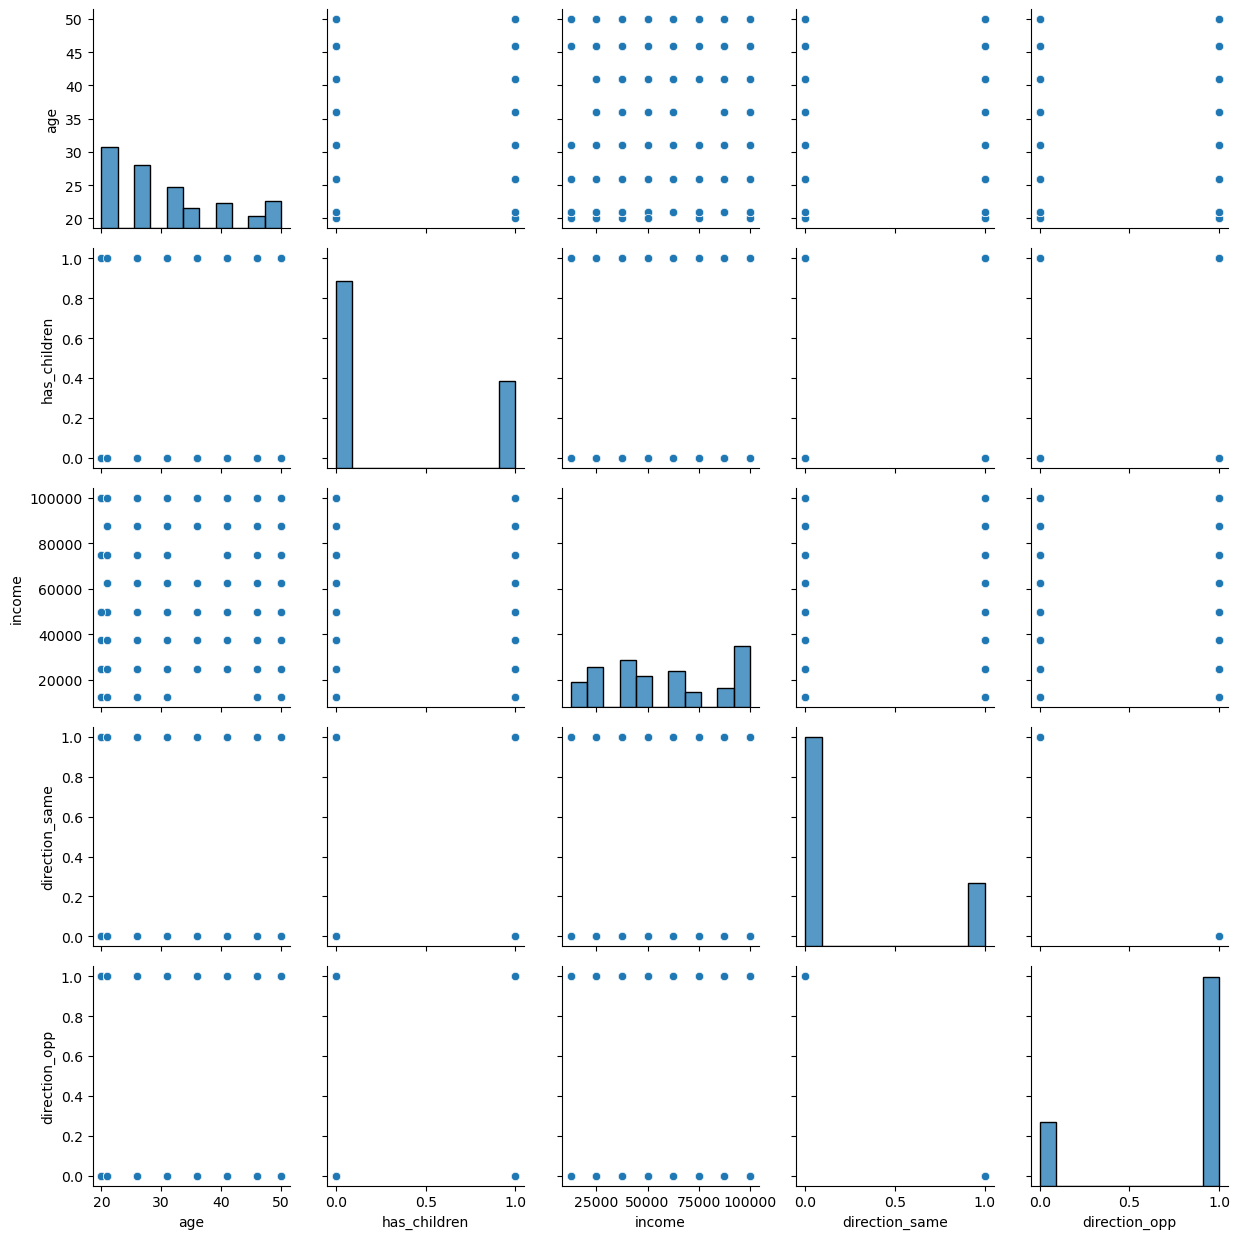

In [272]:
df_bar_coupon_pairplot = df_bar_coupons_acc[['age', 'has_children', 'maritalStatus', 'income', 'direction_same', 'direction_opp']]
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data=df_bar_coupon_pairplot)
plt.tight_layout()
plt.show()
#sns.pairplot(data=df_bar_coupons)

#df_bar_coupons_acc.info()

#Based on the pairplot, it is hard to conclude anything as the data is well distributed as you can see the below plot

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  